<a href="https://colab.research.google.com/github/RHMalalatiana/Recombination_code/blob/main/Distribution_of_Z.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [11]:
def simulate_distances(tAI, tBI, tCI, lam):
    dAI = np.random.poisson(lam * tAI)
    dBI = np.random.poisson(lam * tBI)
    dCI = np.random.poisson(lam * tCI)

    dAB = dAI + dBI
    dAC = dAI + dCI
    dBC = dBI + dCI

    return dAB, dAC, dBC, dAI, dBI

def compute_z_score(dAI, dBI, lam, tAI, tBI):
    S = abs(dAI - dBI)
    var_S = lam * (tAI + tBI)
    Z = S / np.sqrt(var_S) if var_S > 0 else 0
    return S, Z

def simulate_case(case='non_recombinant', lam=1.0):
    if case == 'non_recombinant':
        tAI, tBI, tCI = 2.0, 2.0, 2.0
    elif case == 'recombinant':
        tAI, tBI, tCI = 2.0, 5.0, 4.0
    else:
        raise ValueError("Invalid case.")

    dAB, dAC, dBC, dAI, dBI = simulate_distances(tAI, tBI, tCI, lam)
    _, Z = compute_z_score(dAI, dBI, lam, tAI, tBI)
    return Z




In [12]:
# Run simulations
np.random.seed(42)
n_simulations = 500
Z_non_recomb = [simulate_case('non_recombinant') for _ in range(n_simulations)]
#Z_recomb = [simulate_case('recombinant') for _ in range(n_simulations)]

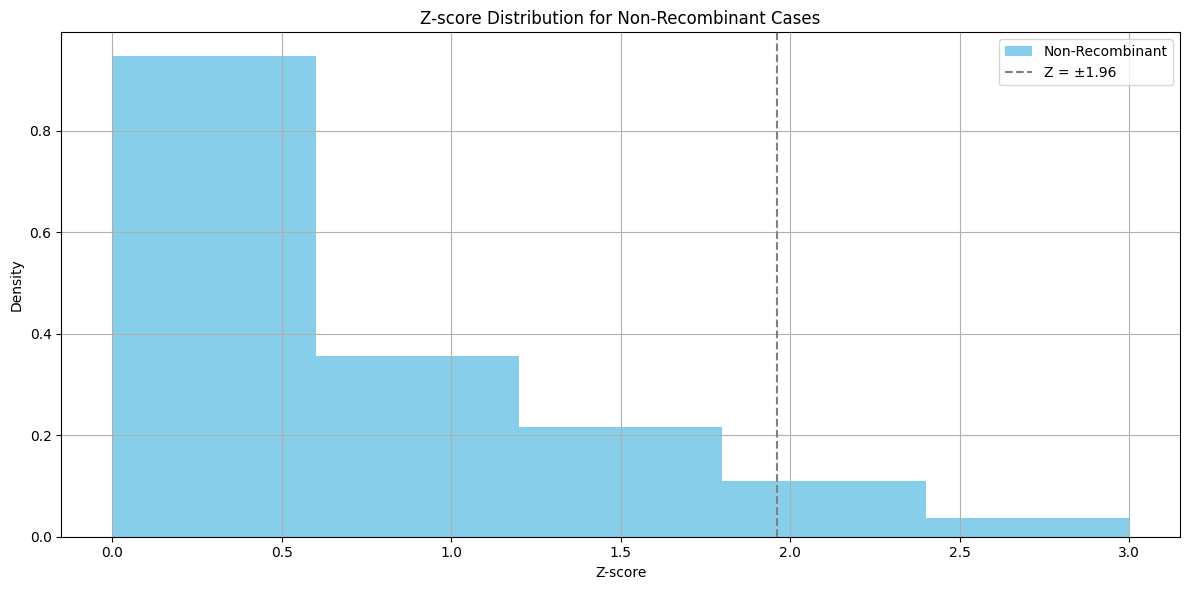

In [16]:
# Plotting
plt.figure(figsize=(12, 6))
plt.hist(Z_non_recomb, bins=5, label='Non-Recombinant', color='skyblue', density=True)
#plt.hist(Z_recomb, bins=50, alpha=0.6, label='Recombinant', color='salmon', density=True)

#x = np.linspace(-6, 6, 300)
#plt.plot(x, norm.pdf(x), 'k--', label='Standard Normal N(0,1)')
plt.axvline(1.96, color='gray', linestyle='dashed', label='Z = ±1.96')
#plt.axvline(-1.96, color='gray', linestyle='dashed')

plt.title('Z-score Distribution for Non-Recombinant Cases')
plt.xlabel('Z-score')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()